<a href="https://colab.research.google.com/github/joanRVAllen/joanvillar/blob/master/GDPandSuicide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Portfolio:

https://joanrvallen.github.io/joanvillar/

In [ ]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Suicide per country dataset:



https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

In [ ]:
#import dataset

from google.colab import files
uploaded = files.upload()

Saving master.csv to master.csv


In [ ]:
df=pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Suicide Dataset Cleaning

**Suicide Dataset**

This dataset has a information on suicide based on age group per country. It also contains GDP and GPD per capita from 1985 to 2016 that would be useful in analyzing if there is a relationship between GDP and number of suicides per country

We will narrow down the analysis by this following category:


1.   Age group 35-54 years old
2.   Male

Because of the size of the data, we will only choose the following countries:


1.   Highest GDP per Capita as of 1985 (USA and Canada)
2.   Lowest GDP per Capita as of 1985 (Thailand and Paraguay)
3. GDP per Capita average as of 1985 (Spain and Greece)




In [ ]:
#Countries with lowest GDP per Capita, 35-54 year old males as of 1985
thai=df[(df['country']=='Thailand')&(df['sex']=='male')&(df['age']=='35-54 years')]
para=df[(df['country']=='Paraguay')&(df['sex']=='male')&(df['age']=='35-54 years')]

#Countries with highest GDP per Capita, 35-54 year old males as of 1985
usa=df[(df['country']=='United States')&(df['sex']=='male')&(df['age']=='35-54 years')]
can=df[(df['country']=='Canada')&(df['sex']=='male')&(df['age']=='35-54 years')]

#Countries with medium GDP per Capita, 35-54 year old males as of 1985
spa=df[(df['country']=='Spain')&(df['sex']=='male')&(df['age']=='35-54 years')]
gre=df[(df['country']=='Greece')&(df['sex']=='male')&(df['age']=='35-54 years')]

# Visualization

**Annual GDP per Capita Growth**

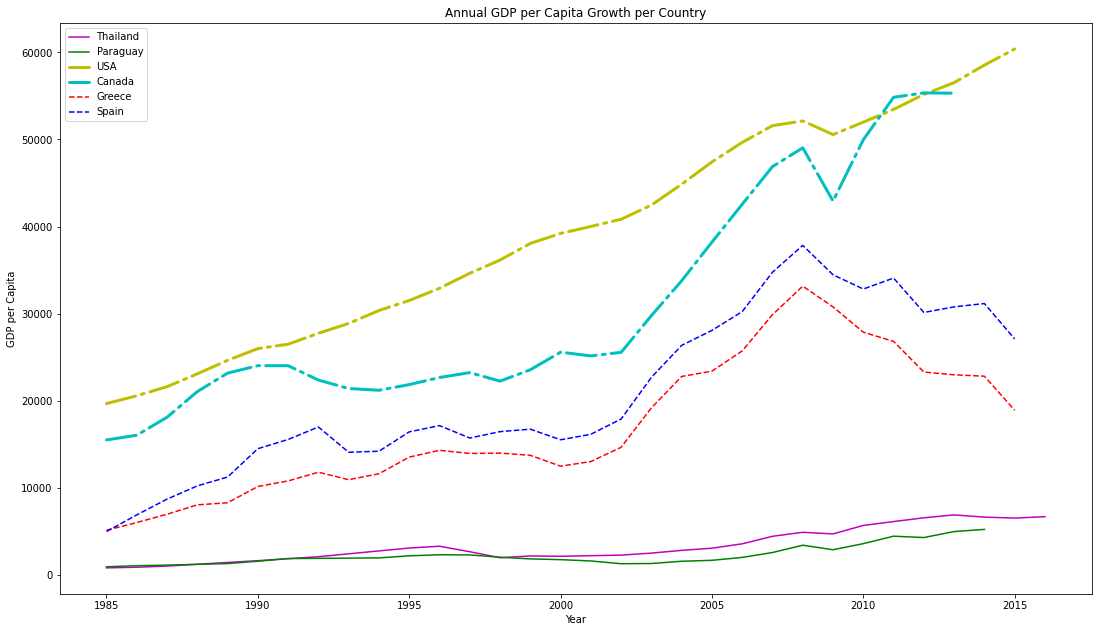

In [ ]:
#figure for the country GDP per capita growth (doesn't account for inflation)

fig, ax=plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True)

#line graph for countries

plt.plot(thai['year'],thai['gdp_per_capita ($)'],c='m',label='Thailand')
plt.plot(para['year'],para['gdp_per_capita ($)'],c='g',label='Paraguay')

plt.plot(usa['year'],usa['gdp_per_capita ($)'],c='y',linewidth=3, linestyle=(0, (10, 2, 1, 2)), dash_capstyle='round',label='USA')
plt.plot(can['year'],can['gdp_per_capita ($)'],c='c',linewidth=3, linestyle=(0, (10, 2, 1, 2)), dash_capstyle='round',label='Canada')

plt.plot(gre['year'],gre['gdp_per_capita ($)'],'r--',label='Greece')
plt.plot(spa['year'],spa['gdp_per_capita ($)'],'b--',label='Spain')

#labels

ax.set_xlabel('Year')
ax.set_ylabel('GDP per Capita')
ax.set_title('Annual GDP per Capita Growth per Country')
ax.legend()

**Description**

The countries with low GDP per Capita have about the same steady growth. The growth for the countries with average GDP per Capitas also have the same growth direction. The countries with the highest GPD however have different direction between 1990 and 2005, but they still have asignificantly higher upward movement compared with other countries.

**Annual Suicides per 100K Population**

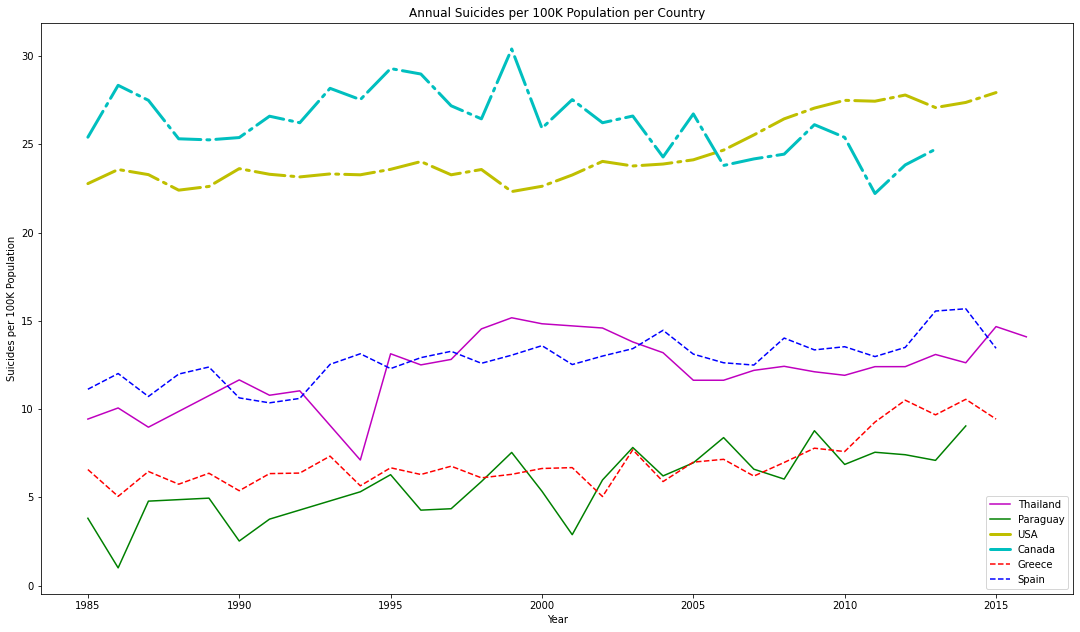

In [ ]:
#Figure for the suicides per 100K population

fig, ax=plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True)

#line graphs for countries

plt.plot(thai['year'],thai['suicides/100k pop'],c='m',label='Thailand')
plt.plot(para['year'],para['suicides/100k pop'],c='g',label='Paraguay')

plt.plot(usa['year'],usa['suicides/100k pop'],c='y',linewidth=3, linestyle=(0, (10, 2, 1, 2)), dash_capstyle='round',label='USA')
plt.plot(can['year'],can['suicides/100k pop'],c='c',linewidth=3, linestyle=(0, (10, 2, 1, 2)), dash_capstyle='round',label='Canada')

plt.plot(gre['year'],gre['suicides/100k pop'],'r--',label='Greece')
plt.plot(spa['year'],spa['suicides/100k pop'],'b--',label='Spain')

#labels

ax.set_xlabel('Year')
ax.set_ylabel('Suicides per 100K Population')
ax.set_title('Annual Suicides per 100K Population per Country')
ax.legend()

**Description**

The countries with lowest GDP per Capita and the countries with the average GPD per Capita have run on about the same level in the graph. However, the countries with the highest GDP per capita have roughly about at least 15 more suicides per 100K population per year.

# Statistical Analysis

**Join the country datasets to one dataframe**

We will join the dataframes to create a dataset that holds all the values needed to compare and do statistical analysis to test if the GDP per capita has statistical association with suicides.

In [ ]:
join=pd.concat([thai,para,usa,can,gre,spa],axis=0)
join.shape

(177, 12)

In [ ]:
print(thai.shape[0]+para.shape[0]+usa.shape[0]+can.shape[0]+gre.shape[0]+spa.shape[0])

177


**T-test on GDP per capita and suicides per 100K population**

In [ ]:
join.rename(columns={'gdp_per_capita ($)':'GDPperCapita','suicides/100k pop':'suicidesper100K',' gdp_for_year ($) ':'GDP'},inplace=True)
join.head()

,country,year,sex,age,suicides_no,population,suicidesper100K,country-year,HDI for year,GDP,GDPperCapita,generation
24983,Thailand,1985,male,35-54 years,448,4748330,9.43,Thailand1985,0.539,"38,900,692,712",840,Silent
24992,Thailand,1986,male,35-54 years,495,4920429,10.06,Thailand1986,NaN,"43,096,746,122",911,Silent
25007,Thailand,1987,male,35-54 years,458,5107474,8.97,Thailand1987,NaN,"50,535,438,696",1045,Silent
25018,Thailand,1990,male,35-54 years,665,5708264,11.65,Thailand1990,0.572,"85,343,063,966",1666,Silent
25030,Thailand,1991,male,35-54 years,636,5900518,10.78,Thailand1991,NaN,"98,234,695,722",1891,Boomers


In [ ]:
from statsmodels.formula.api import ols
model=ols('suicidesper100K~GDPperCapita',data=join).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        suicidesper100K   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     172.2
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           7.76e-28
Time:                        00:43:07   Log-Likelihood:                -560.08
No. Observations:                 177   AIC:                             1124.
Df Residuals:                     175   BIC:                             1131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.9356      0.684     11.602   



# Another Test

In [ ]:
test=df
test.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
testdf=test[(test['age']=='35-54 years')&(test['sex']=='male')&(test['year']==1985)]
testdf.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
272,Antigua and Barbuda,1985,male,35-54 years,0,5970,0.00,Antigua and Barbuda1985,NaN,"240,923,926",3850,Silent
590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,Silent
1430,Australia,1985,male,35-54 years,411,1906800,21.55,Australia1985,NaN,"180,190,994,861",12374,Silent
1788,Austria,1985,male,35-54 years,515,940526,54.76,Austria1985,0.764,"69,386,774,475",9759,Silent
2360,Bahamas,1985,male,35-54 years,1,21000,4.76,Bahamas1985,NaN,"2,320,699,900",11393,Silent


In [ ]:
testdf.sort_values(by='gdp_per_capita ($)', ascending=False).head(7)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
4919,Canada,1985,male,35-54 years,774,3046800,25.40,Canada1985,0.827,"364,756,499,451",15522,Silent
14181,Kuwait,1985,male,35-54 years,6,235600,2.55,Kuwait1985,0.732,"21,442,619,681",14607,Silent
15309,Luxembourg,1985,male,35-54 years,12,50200,23.90,Luxembourg1985,0.752,"4,738,559,685",13743,Silent
11676,Iceland,1985,male,35-54 years,7,25800,27.13,Iceland1985,0.776,"2,939,845,038",13357,Silent
13367,Japan,1985,male,35-54 years,6962,17833300,39.04,Japan1985,0.791,"1,398,892,744,821",12401,Silent
1430,Australia,1985,male,35-54 years,411,1906800,21.55,Australia1985,NaN,"180,190,994,861",12374,Silent


In [ ]:
kuwait=df[(df['country']=='Kuwait')&(df['sex']=='male')&(df['age']=='35-54 years')]
lux=df[(df['country']=='Luxembourg')&(df['sex']=='male')&(df['age']=='35-54 years')]
ice=df[(df['country']=='Iceland')&(df['sex']=='male')&(df['age']=='35-54 years')]
jap=df[(df['country']=='Japan')&(df['sex']=='male')&(df['age']=='35-54 years')]
aus=df[(df['country']=='Australia')&(df['sex']=='male')&(df['age']=='35-54 years')]

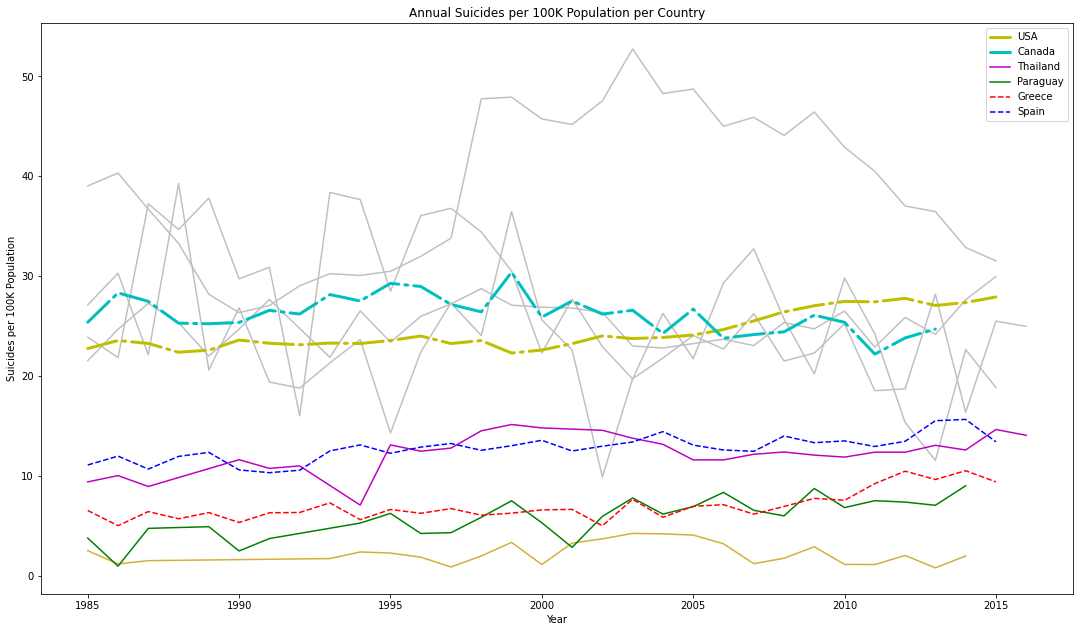

In [ ]:
fig, ax=plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True)

#line graphs for countries

plt.plot(kuwait['year'],kuwait['suicides/100k pop'],c='#d4af37')
plt.plot(lux['year'],lux['suicides/100k pop'],c='#C0C0C0')
plt.plot(ice['year'],ice['suicides/100k pop'],c='#C0C0C0')
plt.plot(jap['year'],jap['suicides/100k pop'],c='#C0C0C0')
plt.plot(aus['year'],aus['suicides/100k pop'],c='#C0C0C0')

plt.plot(usa['year'],usa['suicides/100k pop'],c='y',linewidth=3, linestyle=(0, (10, 2, 1, 2)), dash_capstyle='round',label='USA')
plt.plot(can['year'],can['suicides/100k pop'],c='c',linewidth=3, linestyle=(0, (10, 2, 1, 2)), dash_capstyle='round',label='Canada')

plt.plot(thai['year'],thai['suicides/100k pop'],c='m',label='Thailand')
plt.plot(para['year'],para['suicides/100k pop'],c='g',label='Paraguay')

plt.plot(gre['year'],gre['suicides/100k pop'],'r--',label='Greece')
plt.plot(spa['year'],spa['suicides/100k pop'],'b--',label='Spain')

#labels

ax.set_xlabel('Year')
ax.set_ylabel('Suicides per 100K Population')
ax.set_title('Annual Suicides per 100K Population per Country')
ax.legend()